In [229]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
import os 
import pandas as pd
from scipy import stats
from matplotlib import cm

In [2]:
save_plot = False

plot_dir = 'plots/01/'
os.system('mkdir -p {}'.format(plot_dir))

0

In [3]:
# os.system('module load texlive') # load latex on vollmond

In [4]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "font.family": "serif",
#     "font.serif": "Times",
    'axes.labelsize': 12,
    "legend.fontsize":11,
    "font.sans-serif": ["Helvetica"],
#    "text.latex.preamble": [r'"\usepackage{amsmath}"'],
})


# 1 PeV -> 1 TeV e_cut = 500 MeV

In [5]:
path = 'data/total_defl_moliere_1PeV_1TeV_ecut500/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [1, 2, 3, 4, 5]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

In [6]:
labels = [
    'G4+MSM',
    'vG+MSM',
    'MSM only',
    'vG',
    'G4'
]

0.05409841138396089 0.011164745659066038 0.1416452108955076
100000
0.056924994259316186 0.0135252431903027 0.14425625326490185
1000000
0.047747036859156995 0.007515677127394285 0.12458467363955776
100000
0.02240292810903681 0.0056167030849895196 0.06906055882207983
1000000
0.01655292547477602 0.0037979483035782127 0.06370959550664972
1000000


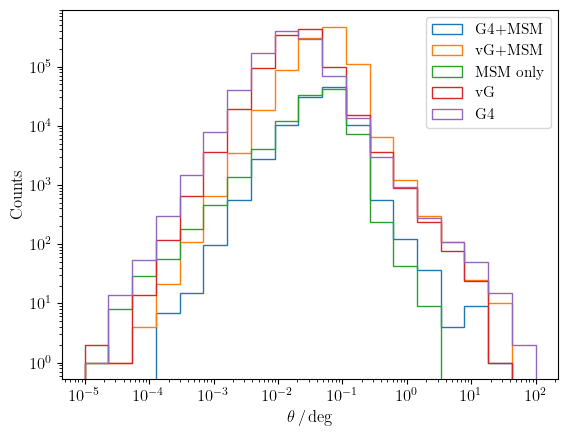

In [7]:
bins = np.logspace(-5, 2, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection.median(), np.quantile(df_dict[df].deflection, 0.05), np.quantile(df_dict[df].deflection, 0.95))
    plt.hist(df_dict[df].deflection, bins=bins, histtype='step', label=labels[i])
    print(len(df_dict[df].deflection))

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')
plt.legend()

# 1 PeV -> 1 TeV v_cut = 0.05

In [10]:
path = 'data/total_defl_moliere_1PeV_1TeV_vcut0_05/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [6, 7, 8, 9, 10]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

0.04177452091888634 0.009134622850469232 0.10865902256679236
1000000
0.044669762040853225 0.01112245478909373 0.11386518004069388
1000000
0.03763968721226911 0.00612881802357889 0.09592499024713602
1000000
0.013015818742557016 0.0019082010357013893 0.06284067984804796
100000
0.0068362621409276 0.0007645903618951739 0.04877348192734382
1000000


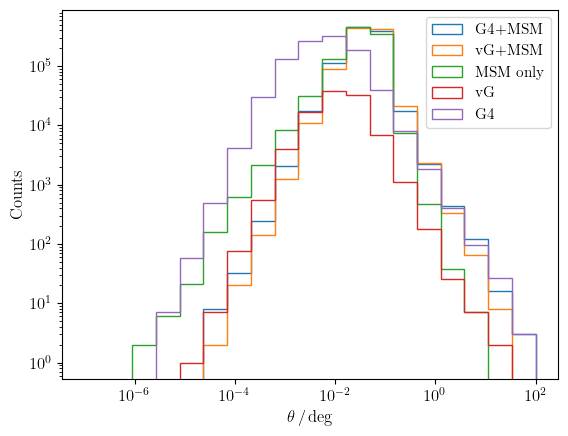

In [11]:
bins = np.logspace(-7, 2, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection.median(), np.quantile(df_dict[df].deflection, 0.05), np.quantile(df_dict[df].deflection, 0.95))
    plt.hist(df_dict[df].deflection, bins=bins, histtype='step', label=labels[i])
    print(len(df_dict[df].deflection))

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')
plt.legend()

# 1 PeV continuous E_f

In [12]:
path = 'data/total_defl_moliere_1PeV_continuous_E_f/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [11, 12]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


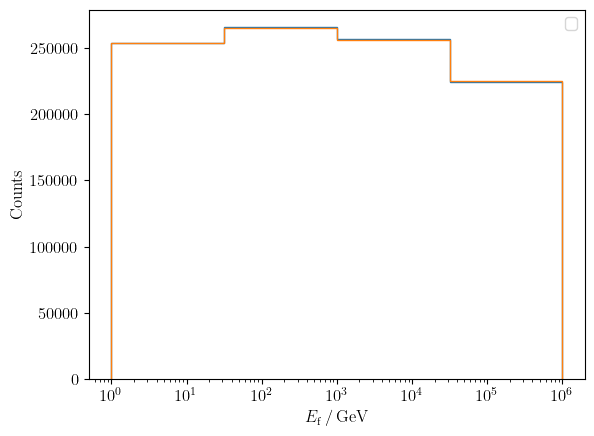

In [13]:
bins = np.logspace(0, 6, 5)
for i, df in enumerate(df_dict.keys()):
    plt.hist(df_dict[df].E_f, bins=bins, histtype='step')

plt.xscale('log')
#plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel('Counts')
plt.legend()

0.036119270109562944 8.146696321197106e-05 1.2340367327186363
0.047814973840642164 9.94820335224587e-05 1.4257909990415374


Text(0, 0.5, 'Counts')

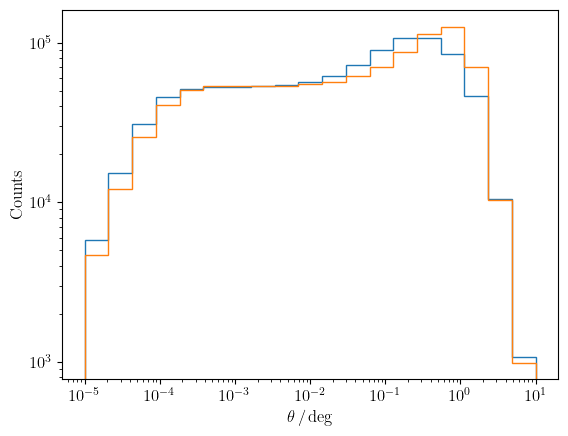

In [14]:
bins = np.logspace(-5, 1, 20)
for i, df in enumerate(df_dict.keys()):
    print(df_dict[df].deflection.median(), np.quantile(df_dict[df].deflection, 0.05), np.quantile(df_dict[df].deflection, 0.95))
    plt.hist(df_dict[df].deflection, bins=bins, histtype='step')

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$\theta\,/\,$deg')
plt.ylabel('Counts')

In [15]:
def paper_medians(x):
    return np.power(10, 0.0176 * x**3 + -0.2328 * x**2 + 0.0929 * x + 0.0726)

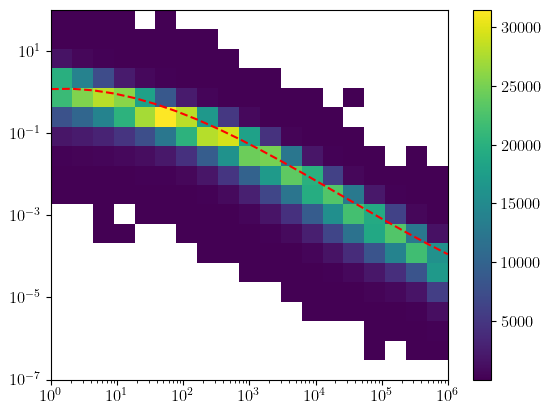

In [16]:
df = 'df_11'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)
plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

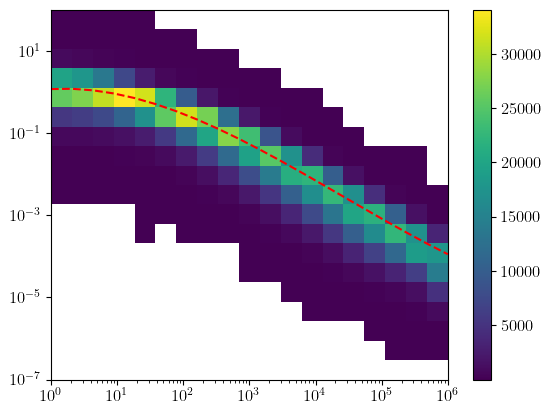

In [17]:
df = 'df_12'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)
plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.colorbar()

In [18]:
def lower_int(x, level=0.99):
    return np.quantile(x, (1-level)/2)

def upper_int(x, level=0.99):
    return np.quantile(x, level + (1-level)/2)

[1.07309406e+00 1.00500908e+00 8.83062436e-01 7.14353852e-01
 5.34242320e-01 3.73251670e-01 2.44462103e-01 1.47882284e-01
 8.37267354e-02 4.44301218e-02 2.25665996e-02 1.10566513e-02
 5.38760268e-03 2.59677104e-03 1.26013708e-03 6.39401794e-04
 3.32197500e-04 1.74401946e-04 7.21729158e-05]
[8.18488478e-02 8.18847047e-02 7.17599955e-02 5.76730298e-02
 4.08997943e-02 2.69975597e-02 1.32208276e-02 6.47080211e-03
 3.09460727e-03 1.58636765e-03 7.89026818e-04 3.62629006e-04
 1.79177753e-04 8.92150652e-05 4.37186203e-05 2.51537423e-05
 1.41727654e-05 7.96347042e-06 2.95755867e-06]


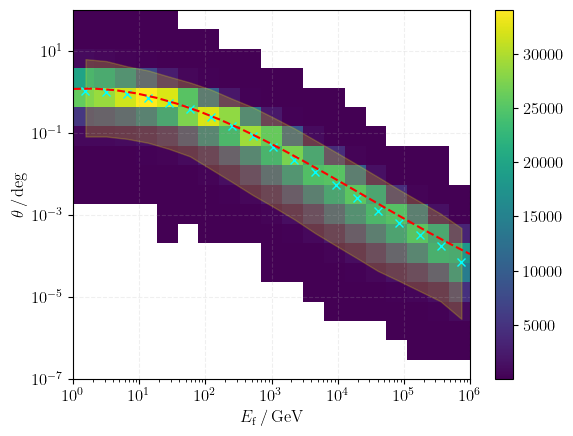

In [19]:


df = 'df_12'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]

ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, 'x', color='cyan')
print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.2, color='yellow')
print(ret_lower.statistic)

plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$\theta\,/\,$deg')
plt.colorbar()
plt.grid(alpha=0.2, linestyle='--')

In [20]:
df = 'df_12'
bins = (np.logspace(0, 6, 20), np.logspace(-8, 3, 20))
ret = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0], )
ret.statistic

array([1.07309406e+00, 1.00500908e+00, 8.83062436e-01, 7.14353852e-01,
       5.34242320e-01, 3.73251670e-01, 2.44462103e-01, 1.47882284e-01,
       8.37267354e-02, 4.44301218e-02, 2.25665996e-02, 1.10566513e-02,
       5.38760268e-03, 2.59677104e-03, 1.26013708e-03, 6.39401794e-04,
       3.32197500e-04, 1.74401946e-04, 7.21729158e-05])

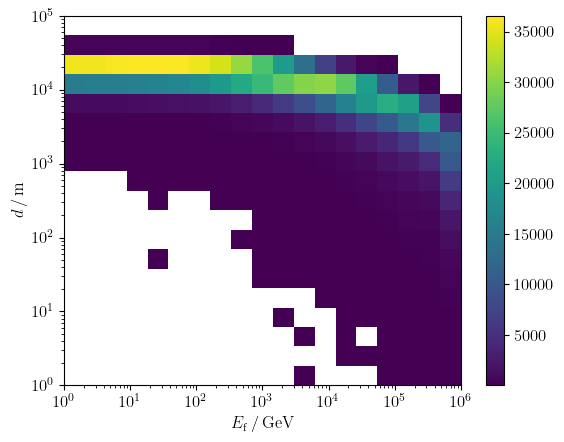

In [21]:
df = 'df_12'
bins = (np.logspace(0, 6, 20), np.logspace(0, 5, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].distances, bins=bins, cmin=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$d\,/\,$m')
plt.colorbar()

# die Distanz korreliert nicht sehr stark mit der finalen Energie, sondern eher mit der initialen Energie
# da die initiale Energie keinen Einfluss auf die totale Ablenkung hat, ist somit auch die Distanz nicht relevant

2839.2322746640043
8149.393619031057
13506.44430089527
17285.25530836737
18506.470769946427
18691.740604882394


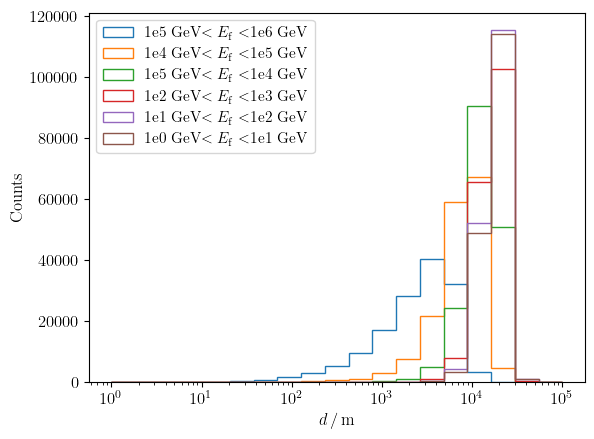

In [22]:
df = 'df_12'
bins = np.logspace(0, 5, 20)
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e6) & (df_dict[df].E_f > 1e5)], bins=bins, histtype='step', label=r'1e5 GeV$< E_{\mathrm{f}} < $1e6 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e5) & (df_dict[df].E_f > 1e4)], bins=bins, histtype='step', label=r'1e4 GeV$< E_{\mathrm{f}} < $1e5 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e4) & (df_dict[df].E_f > 1e3)], bins=bins, histtype='step', label=r'1e5 GeV$< E_{\mathrm{f}} < $1e4 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)], bins=bins, histtype='step', label=r'1e2 GeV$< E_{\mathrm{f}} < $1e3 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e2) & (df_dict[df].E_f > 1e1)], bins=bins, histtype='step', label=r'1e1 GeV$< E_{\mathrm{f}} < $1e2 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e1) & (df_dict[df].E_f > 1e0)], bins=bins, histtype='step', label=r'1e0 GeV$< E_{\mathrm{f}} < $1e1 GeV')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$d\,/\,$m')
plt.ylabel('Counts')
plt.legend()


print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e6) & (df_dict[df].E_f > 1e5)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e5) & (df_dict[df].E_f > 1e4)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e4) & (df_dict[df].E_f > 1e3)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e2) & (df_dict[df].E_f > 1e1)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e1) & (df_dict[df].E_f > 1e0)]))

Text(0, 0.5, '$y_{\\mathrm{f}}\\,/\\,$cm')

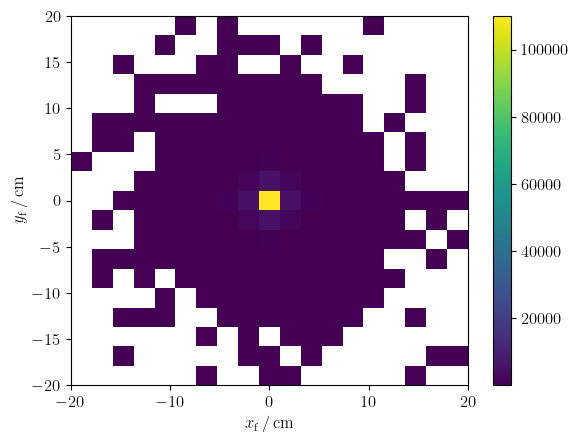

In [23]:
df = 'df_12'
bins = (np.linspace(-20, 20, 20), np.linspace(-20, 20, 20))
plt.hist2d(df_dict[df].x_f[(df_dict[df].E_f < 1e6) & (df_dict[df].E_f > 1e5)], df_dict[df].y_f[(df_dict[df].E_f < 1e6) & (df_dict[df].E_f > 1e5)], bins=bins, cmin=1) 
plt.colorbar()

plt.xlabel(r'$x_{\mathrm{f}}\,/\,$cm')
plt.ylabel(r'$y_{\mathrm{f}}\,/\,$cm')

Text(0, 0.5, '$y_{\\mathrm{f}}\\,/\\,$cm')

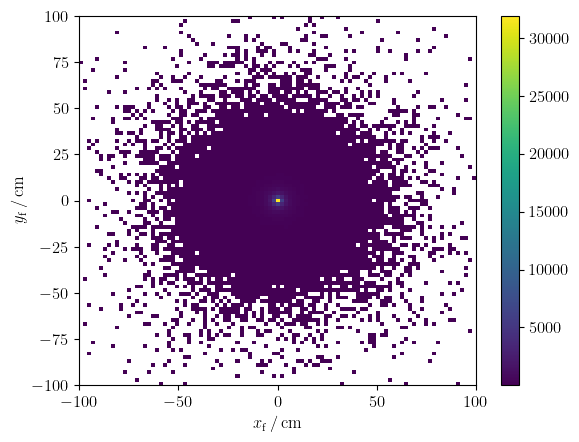

In [24]:
df = 'df_12'
bins = (np.linspace(-100, 100, 100), np.linspace(-100, 100, 100))
plt.hist2d(df_dict[df].x_f[(df_dict[df].E_f < 1e5) & (df_dict[df].E_f > 1e4)], df_dict[df].y_f[(df_dict[df].E_f < 1e5) & (df_dict[df].E_f > 1e4)], bins=bins, cmin=1)
plt.colorbar()

plt.xlabel(r'$x_{\mathrm{f}}\,/\,$cm')
plt.ylabel(r'$y_{\mathrm{f}}\,/\,$cm')

Text(0, 0.5, '$y_{\\mathrm{f}}\\,/\\,$cm')

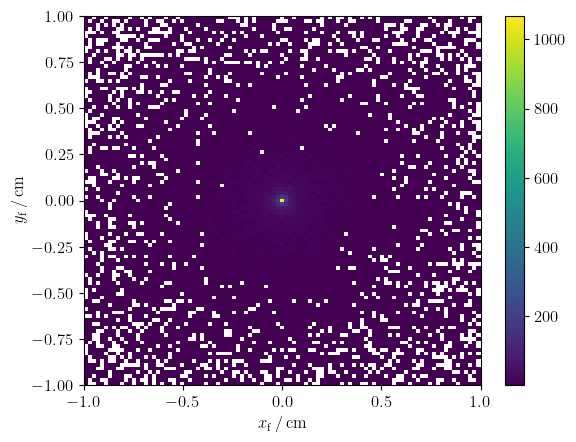

In [25]:
df = 'df_12'
bins = (np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
plt.hist2d(df_dict[df].x_f[(df_dict[df].E_f < 1e5) & (df_dict[df].E_f > 1e4)], df_dict[df].y_f[(df_dict[df].E_f < 1e5) & (df_dict[df].E_f > 1e4)], bins=bins, cmin=1)
plt.colorbar()

plt.xlabel(r'$x_{\mathrm{f}}\,/\,$cm')
plt.ylabel(r'$y_{\mathrm{f}}\,/\,$cm')

Text(0, 0.5, '$y_{\\mathrm{f}}\\,/\\,$cm')

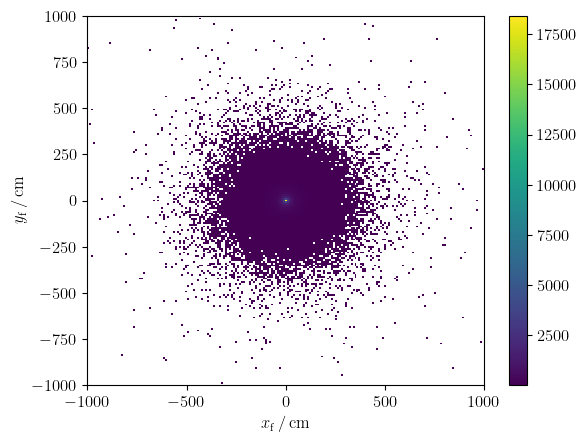

In [26]:
df = 'df_12'
bins = (np.linspace(-1000, 1000, 200), np.linspace(-1000, 1000, 200))
plt.hist2d(df_dict[df].x_f[(df_dict[df].E_f < 1e4) & (df_dict[df].E_f > 1e3)], df_dict[df].y_f[(df_dict[df].E_f < 1e4) & (df_dict[df].E_f > 1e3)], bins=bins, cmin=1)
plt.colorbar()

plt.xlabel(r'$x_{\mathrm{f}}\,/\,$cm')
plt.ylabel(r'$y_{\mathrm{f}}\,/\,$cm')

Text(0, 0.5, '$y_{\\mathrm{f}}\\,/\\,$cm')

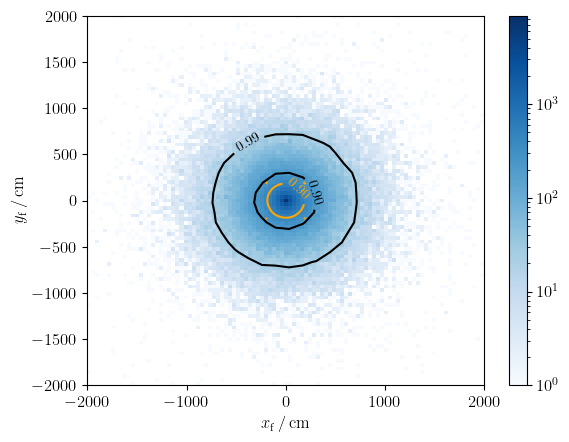

In [194]:
df = 'df_12'
bins = (np.linspace(-2000, 2000, 100), np.linspace(-2000, 2000, 100))
x = df_dict[df].x_f[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)]
y = df_dict[df].y_f[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)]
counts, xedges, yedges, image = plt.hist2d(x, y, bins=bins, cmin=1, cmap='Blues', norm=LogNorm())
plt.colorbar()


xx, yy = np.mgrid[x.min():x.max():500j, y.min():y.max():500j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

z = (f.max() - f) / (f.max() - f.min())
contour = plt.contour(xx, yy, z, [0.9, 0.99], colors='black', extent=[x.min(), x.max(), y.min(), y.max()])
plt.clabel(contour, fontsize=10, colors='black', fmt[0.9]='dummski')


plt.xlabel(r'$x_{\mathrm{f}}\,/\,$cm')
plt.ylabel(r'$y_{\mathrm{f}}\,/\,$cm')

Text(0, 0.5, '$y_{\\mathrm{f}}\\,/\\,$cm')

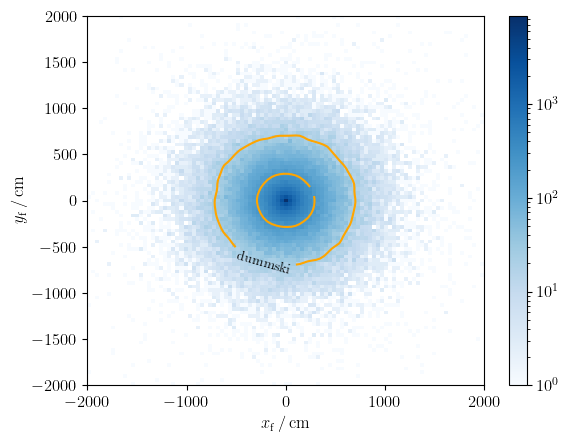

In [198]:
df = 'df_12'
bins = (np.linspace(-2000, 2000, 100), np.linspace(-2000, 2000, 100))
x = df_dict[df].x_f[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)]
y = df_dict[df].y_f[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)]
counts, xedges, yedges, image = plt.hist2d(x, y, bins=bins, cmin=1, cmap='Blues', norm=LogNorm())
plt.colorbar()


xx, yy = np.mgrid[bins[0].min():bins[0].max():complex(len(bins[0])), bins[1].min():bins[1].max():complex(len(bins[1]))]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = stats.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

z = (f.max() - f) / (f.max() - f.min())
contour = plt.contour(xx, yy, z, [0.9, 0.99], colors='orange')
plt.clabel(contour, fontsize=10, colors='black', fmt={0.99: 'dummski'})


plt.xlabel(r'$x_{\mathrm{f}}\,/\,$cm')
plt.ylabel(r'$y_{\mathrm{f}}\,/\,$cm')

Text(0, 0.5, '$y_{\\mathrm{f}}\\,/\\,$cm')

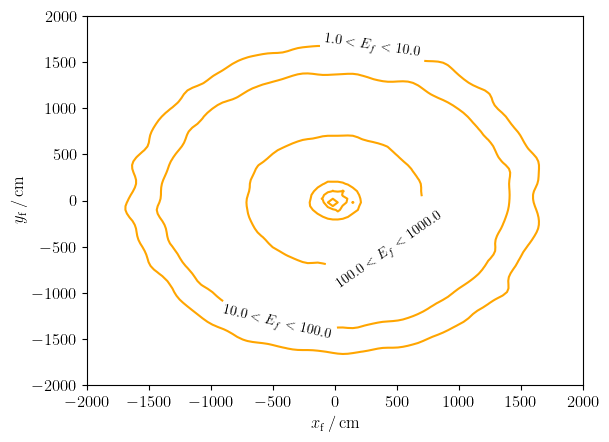

In [204]:
df = 'df_12'
e_f_mins = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5]
e_f_maxs = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
for e_f_min, e_f_max in zip(e_f_mins, e_f_maxs):
    bins = (np.linspace(-2000, 2000, 100), np.linspace(-2000, 2000, 100))
    x = df_dict[df].x_f[(df_dict[df].E_f < e_f_max) & (df_dict[df].E_f > e_f_min)]
    y = df_dict[df].y_f[(df_dict[df].E_f < e_f_max) & (df_dict[df].E_f > e_f_min)]


    xx, yy = np.mgrid[bins[0].min():bins[0].max():complex(len(bins[0])), bins[1].min():bins[1].max():complex(len(bins[1]))]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    z = (f.max() - f) / (f.max() - f.min())
    contour = plt.contour(xx, yy, z, [0.99], colors='orange')
    plt.clabel(contour, fontsize=10, colors='black', fmt={0.99: rf'${e_f_min} < E_f < {e_f_max}$'})


plt.xlabel(r'$x_{\mathrm{f}}\,/\,$cm')
plt.ylabel(r'$y_{\mathrm{f}}\,/\,$cm')

Text(0, 0.5, '$y_{\\mathrm{f}}\\,/\\,$cm')

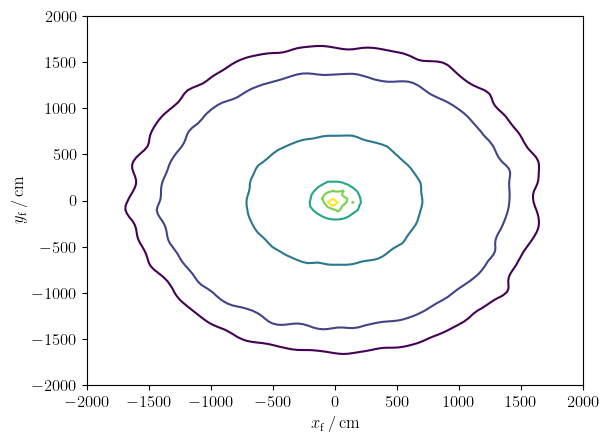

In [244]:
df = 'df_12'
e_f_mins = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
colors = [
    '#440154',
    '#414487',
    '#2a788e',
    '#22a884',
    '#7ad151',
    '#fde725',
]

for i in range(len(e_f_mins)-1):
    bins = (np.linspace(-2000, 2000, 100), np.linspace(-2000, 2000, 100))
    x = df_dict[df].x_f[(df_dict[df].E_f < e_f_mins[i+1]) & (df_dict[df].E_f > e_f_mins[i])]
    y = df_dict[df].y_f[(df_dict[df].E_f < e_f_mins[i+1]) & (df_dict[df].E_f > e_f_mins[i])]


    xx, yy = np.mgrid[bins[0].min():bins[0].max():complex(len(bins[0])), bins[1].min():bins[1].max():complex(len(bins[1]))]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    z = (f.max() - f) / (f.max() - f.min())
    contour = plt.contour(xx, yy, z, [0.99], colors=colors[i])
    


plt.xlabel(r'$x_{\mathrm{f}}\,/\,$cm')
plt.ylabel(r'$y_{\mathrm{f}}\,/\,$cm')

In [243]:
# Define the number of colors and create the color gradient
num_colors = 6
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))

# Print the HTML hex color strings
html_hex_colors = [mpl.colors.rgb2hex(color) for color in colors]
for color in html_hex_colors:
    print(color)

#440154
#414487
#2a788e
#22a884
#7ad151
#fde725


0
0
0
0
0
0
0
0
0
0
0
0


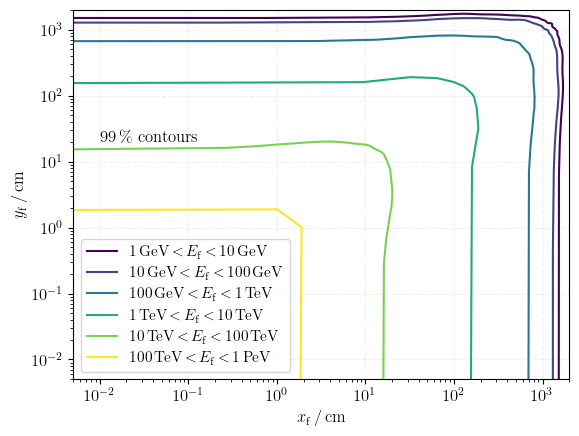

In [290]:
df = 'df_12'
e_f_mins = [1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6]
e_f_mins_labels = ['1\,GeV', '10\,GeV', '100\,GeV', '1\,TeV', '10\,TeV', '100\,TeV', '1\,PeV']
colors = [
    '#440154',
    '#414487',
    '#2a788e',
    '#22a884',
    '#7ad151',
    '#fde725',
]
legend_elements = []
for i, l in zip(range(len(e_f_mins)-1), e_f_mins_labels):
    if e_f_mins[i+1] < 1e5:
        bins = (np.logspace(-8, 3.5, 100), np.logspace(-8, 3.5, 100))
    else: 
        bins = (np.logspace(-8, 2, 100), np.logspace(-8, 2, 100))
    x = abs(df_dict[df].x_f[(df_dict[df].E_f < e_f_mins[i+1]) & (df_dict[df].E_f > e_f_mins[i])])
    y = abs(df_dict[df].y_f[(df_dict[df].E_f < e_f_mins[i+1]) & (df_dict[df].E_f > e_f_mins[i])])

    print(len(x[x==0]))
    print(len(y[y==0]))

    # plt.hist(x, bins=np.logspace(-8, 3, 100))
    xx, yy = np.mgrid[bins[0].min():bins[0].max():complex(len(bins[0])), bins[1].min():bins[1].max():complex(len(bins[1]))]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)

    z = (f.max() - f) / (f.max() - f.min())
    contour = plt.contour(xx, yy, z, [0.99], colors=colors[i])
    # labels = plt.clabel(contour, colors=colors[i]) # fmt={0.99: rf'${e_f_mins[i]} <$' + r'$E_{\mathrm{f}}$'+ rf'$< {e_f_mins[i+1]}$'}

    legend_elements.append(plt.Line2D([0], [0], linestyle='-', color=colors[i], label=rf'{e_f_mins_labels[i]}$\,<\,$' + r'$E_{\mathrm{f}}$'+ rf'$\,<\,${e_f_mins_labels[i+1]}'))
plt.legend(handles=legend_elements, loc='lower left')
plt.xlim(5e-3, 2e3)
plt.ylim(5e-3, 2e3)
plt.text(1e-2, 2e1, r'$99\,\%$ contours')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$x_{\mathrm{f}}\,/\,$cm')
plt.ylabel(r'$y_{\mathrm{f}}\,/\,$cm')
plt.grid(alpha=0.2, linestyle='--')

# in diese Verteilung kann ich einen Kreis mit 99% content reinfitten und dann alle Kreise zusammen in einen Plot packen

# 1 TeV continuous E_f

In [ ]:
path = 'data/total_defl_moliere_1TeV_continuous_E_f/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [13, 14]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

In [ ]:
df = 'df_14'
bins = (np.logspace(0, 6, 20), np.logspace(-7, 2, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1)

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]

ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, 'x', color='cyan')
print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.2, color='yellow')

plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$\theta\,/\,$deg')
plt.colorbar()
plt.grid(alpha=0.2, linestyle='--')

In [ ]:
df = 'df_14'
bins = (np.logspace(0, 6, 20), np.logspace(0, 5, 20))
plt.hist2d(df_dict[df].E_f, df_dict[df].distances, bins=bins, cmin=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$d\,/\,$m')
plt.colorbar()

In [ ]:
df = 'df_14'
bins = np.logspace(0, 5, 20)
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)], bins=bins, histtype='step', label=r'1e2 GeV$< E_{\mathrm{f}} < $1e3 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e2) & (df_dict[df].E_f > 1e1)], bins=bins, histtype='step', label=r'1e1 GeV$< E_{\mathrm{f}} < $1e2 GeV')
plt.hist(df_dict[df].distances[(df_dict[df].E_f < 1e1) & (df_dict[df].E_f > 1e0)], bins=bins, histtype='step', label=r'1e0 GeV$< E_{\mathrm{f}} < $1e1 GeV')
plt.xscale('log')
# plt.yscale('log')
plt.xlabel(r'$d\,/\,$m')
plt.ylabel('Counts')
plt.legend()


print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e3) & (df_dict[df].E_f > 1e2)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e2) & (df_dict[df].E_f > 1e1)]))
print(np.median(df_dict[df].distances[(df_dict[df].E_f < 1e1) & (df_dict[df].E_f > 1e0)]))

# 10 PeV continuous E_f

In [ ]:
path = 'data/total_defl_moliere_10PeV_continuous_E_f/'

df_dict = {}
for hdf, s in zip(sorted(os.listdir(path)), [15, 16]):
    df = pd.read_hdf(path + hdf, key=f'seed_{s}')
    df_dict['df_%02d' %(s)] = df

In [ ]:
df = 'df_16'
bins = (np.logspace(0, 7, 100), np.logspace(-7, 2, 100))
plt.hist2d(df_dict[df].E_f, df_dict[df].deflection, bins=bins, cmin=1, norm=LogNorm())

bin_mids = [bins[0][i] + (bins[0][i+1] - bins[0][i])/2 for i in range(len(bins[0])-1)]

ret_median = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic='median', bins=bins[0])
plt.plot(bin_mids, ret_median.statistic, 'x', color='cyan')
print(ret_median.statistic)

ret_lower = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=lower_int, bins=bins[0])
# plt.plot(bin_mids, ret_lower.statistic, '.b')
ret_upper = stats.binned_statistic(df_dict[df].E_f.values, values=df_dict[df].deflection.values, statistic=upper_int, bins=bins[0])
# plt.plot(bin_mids, ret_upper.statistic, '.b')
# plt.fill_between(bin_mids, ret_lower.statistic, ret_upper.statistic, alpha=0.7, color='yellow')
print(ret_lower.statistic)

plt.plot(bins[0], paper_medians(np.log10(bins[0])), 'r--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$E_{\mathrm{f}}\,/\,$GeV')
plt.ylabel(r'$\theta\,/\,$deg')
plt.colorbar()
plt.grid(alpha=0.2, linestyle='--')